<Figure size 1200x800 with 0 Axes>

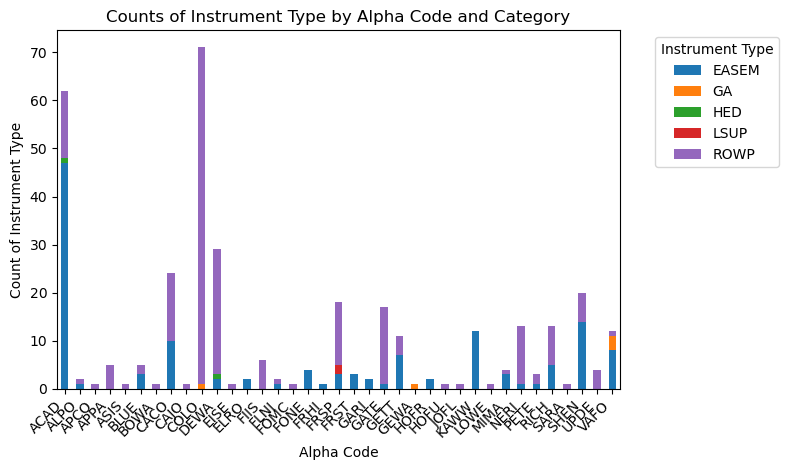

<Figure size 1000x600 with 0 Axes>

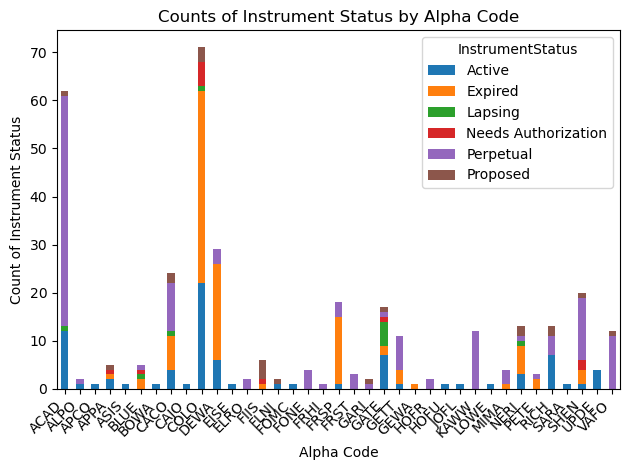

In [5]:
#TASK - Visualize the number of instruments in your Region by Type and Status
##PRE-TASK - Export an Excel from MLC for your region listing all instruments
    ## Delete the top two rows from the excel, as they interfere with the headings
    ## Save the spreadsheet in a convenient spot
    ## Copy and past the file pathway of your spreadsheet into the "" marks of the "file_path_inst" variable below

#This code imports the libraries you will need - Pandas deals with converting xls to dataframes
    # matplotlib provides tool to graph and visualize data
import pandas as pd
import matplotlib.pyplot as plt

# Read the spreadsheet
file_path_inst = r"F:\ROW\ROW_Park_Folders\MLC-Instrument-NER-04152024.xlsx"
df_inst = pd.read_excel(file_path_inst)

# Create a bar graph for counts of InstrumentTypeCode by Alphacode and InstrumentTypeCode categories
instrument_counts = df_inst.groupby(['Alphacode', 'InstrumentTypeCode']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
instrument_counts.plot(kind='bar', stacked=True)
plt.title('Counts of Instrument Type by Alpha Code and Category')
plt.xlabel('Alpha Code')
plt.ylabel('Count of Instrument Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Instrument Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create a bar graph for counts of InstrumentStatus by Alphacode
status_counts = df_inst.groupby(['Alphacode', 'InstrumentStatus']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', stacked=True)
plt.title('Counts of Instrument Status by Alpha Code')
plt.xlabel('Alpha Code')
plt.ylabel('Count of Instrument Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

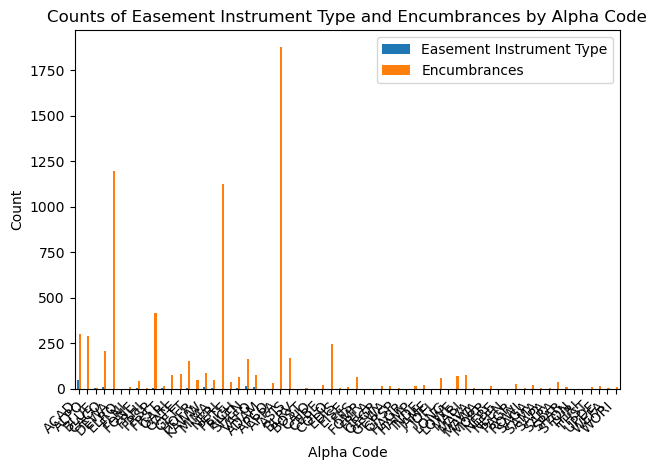

In [6]:
# THIS CELL TAKES DATA FROM THE TWO SPREADSHEETS, AND SHOWS HOW MANY ENCUMBRANCES ARE ON FILE 
    # VERSUS HOW MANY INSTRUMNET TYPE EASEMENTS HAVE BEEN LOGGED 
    
import pandas as pd
import matplotlib.pyplot as plt

# Read the spreadsheet for df_enc
file_path_enc = r"F:\ROW\ROW_Park_Folders\MLC-Encumbrance-NER-04152024.xlsx"
df_enc = pd.read_excel(file_path_enc)

# Read the spreadsheet for df_inst
file_path_inst = r"F:\ROW\ROW_Park_Folders\MLC-Instrument-NER-04152024.xlsx"
df_inst = pd.read_excel(file_path_inst)

# Check if df_inst and df_enc are not empty
if not df_inst.empty and not df_enc.empty:
    # Filter df_inst to include only rows where InstrumentTypeCode is 'Easement'
    df_inst_easement = df_inst[df_inst['InstrumentTypeCode'] == 'EASEM']
    
    # Group counts of Easement InstrumentTypeCode by Alphacode
    easement_counts_inst = df_inst_easement.groupby('Alphacode').size()

    # Group counts of encumbrances by Alphacode in df_enc
    encumbrance_counts_enc = df_enc.groupby('Alphacode').size()

    # Merge counts from both dataframes
    merged_counts = pd.concat([easement_counts_inst, encumbrance_counts_enc], axis=1)
    merged_counts.columns = ['Easement Instrument Type', 'Encumbrances']
    
    # Filter out ALPHA categories with zero count for both
    merged_counts = merged_counts[(merged_counts['Easement Instrument Type'] != 0) | (merged_counts['Encumbrances'] != 0)]

    # Plot merged counts in a bar chart
    plt.figure(figsize=(12, 8))
    merged_counts.plot(kind='bar')
    plt.title('Counts of Easement Instrument Type and Encumbrances by Alpha Code')
    plt.xlabel('Alpha Code')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
else:
    if df_inst.empty:
        print("df_inst is empty")
    if df_enc.empty:
        print("df_enc is empty")

In [26]:
# THIS CELL TAKES DATA FROM THE TWO SPREADSHEETS, AND SHOWS HOW MANY ENCUMBRANCES ARE ON FILE FOR THE TOP TEN PARKS;
    # VERSUS HOW MANY INSTRUMNET TYPE EASEMENTS HAVE BEEN LOGGED FOR THOSE SAME TOP TEN PARKS
    # THIS PROVIDES A SAMPLE OF THE GAP IN TERMS OF DATA ENTRY FOR EXISTING EASEMENTS IN TERMS OF 
        # COLLECTING EASEMENT INSTRUMENTS; CREATING MLC USE INSTRUMENT ENTRIES; AND MAPPING EASEMENTS WHERE EITHER
        # PAPER MAPS, DESCRIPTIONS, OR AERIAL DATA MAY BE ABLE TO INDICATE WHERE THESE EASEMENTS ARE LOCATED IN A PARK
    
import pandas as pd
import matplotlib.pyplot as plt

# Read the spreadsheet for df_enc
file_path_enc = r"F:\ROW\ROW_Park_Folders\MLC-Encumbrance-NER-04152024.xlsx"
df_enc = pd.read_excel(file_path_enc)

# Read the spreadsheet for df_inst
file_path_inst = r"F:\ROW\ROW_Park_Folders\MLC-Instrument-NER-04152024.xlsx"
df_inst = pd.read_excel(file_path_inst)

# Check if both df_enc and df_inst are not empty
if not df_enc.empty and not df_inst.empty:
    # Group counts of encumbrances by Alphacode in df_enc and select top 10
    top_encumbrance_alphas = df_enc['Alphacode'].value_counts().nlargest(10).index

    # Filter df_inst to include only rows where InstrumentTypeCode is 'EASEM' and ALPHAs are from the top 10 ALPHAs
    df_inst_easem_top10 = df_inst[(df_inst['InstrumentTypeCode'] == 'EASEM') & df_inst['Alphacode'].isin(top_encumbrance_alphas)]

    # Group counts of EASEM by Alphacode in df_inst_easem_top10
    easem_counts_top10 = df_inst_easem_top10['Alphacode'].value_counts()

    # Get counts of rows for each ALPHA from df_enc
    encumbrance_counts_top10 = df_enc[df_enc['Alphacode'].isin(top_encumbrance_alphas)]['Alphacode'].value_counts()

    # Create a DataFrame to display the results
    results_df = pd.DataFrame({'Top 10 ALPHAs': top_encumbrance_alphas,
                               'Encumbrance Counts': [encumbrance_counts_top10.get(alpha, 0) for alpha in top_encumbrance_alphas],
                               'EASEM Counts': [easem_counts_top10.get(alpha, 0) for alpha in top_encumbrance_alphas]})

    print(results_df)

else:
    if df_enc.empty:
        print("df_enc is empty")
    if df_inst.empty:
        print("df_inst is empty")

  Top 10 ALPHAs  Encumbrance Counts  EASEM Counts
0          APPA                1875             0
1          DEWA                1196             2
2          NERI                1126             1
3          FRSP                 415             3
4          ACAD                 303            47
5          ALPO                 293             1
6          COLO                 244             0
7          CACO                 210            10
8          ASIS                 171             0
9          SHEN                 166            14


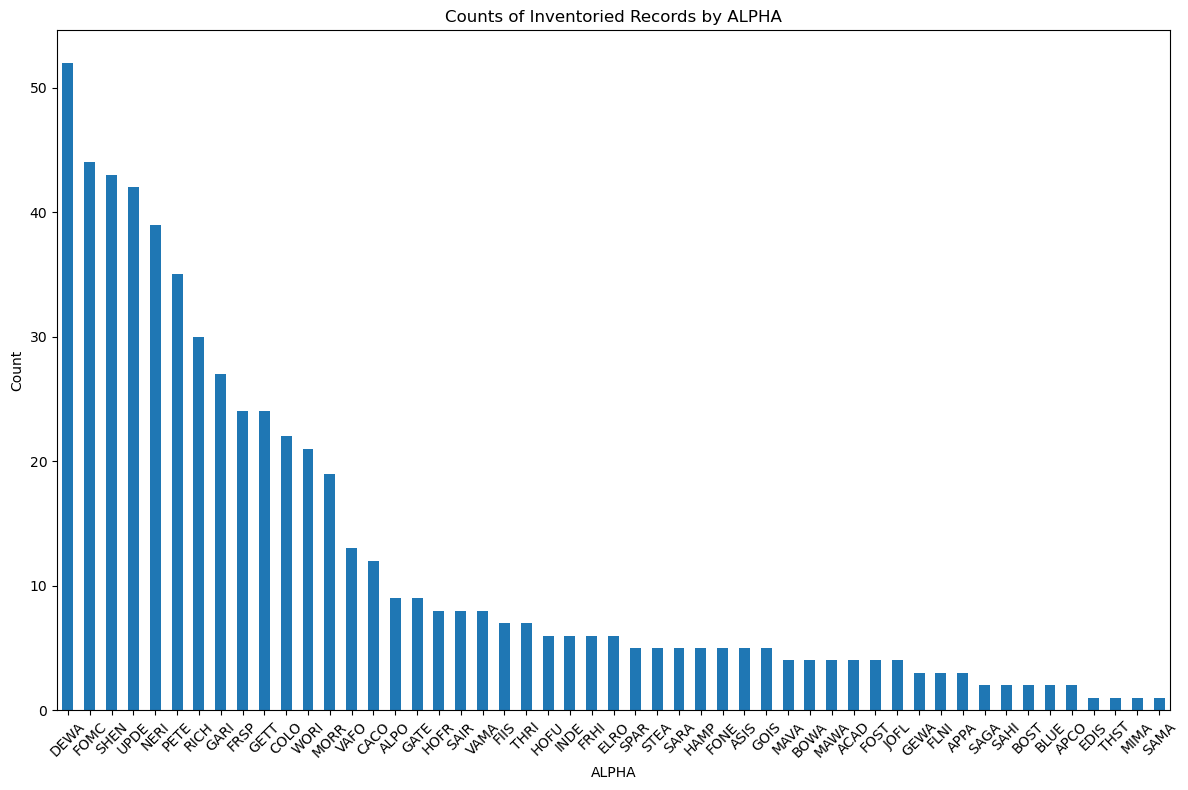

In [28]:
# CELL THAT GRAPHS COUNT OF INVENTORIED RECORDS BY ALPHA TO SHOW WHICH PARKS NEED THE MOST FOLLOW UP
    #TO COLLECT MISSING INSTRUMENTS
import pandas as pd
import matplotlib.pyplot as plt

# Read the spreadsheet for df_enc
file_path_inv = r"F:\ROW\ROW_Park_Folders\MLC-InventoriedRecords-NER-04182024.xlsx"
df_inv = pd.read_excel(file_path_inv)

# Check if df_inv is not empty
if not df_inv.empty:
    # Group counts of inventoried records by Alphacode
    inventoried_records_counts = df_inv['Alphacode'].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(12, 8))
    inventoried_records_counts.plot(kind='bar')
    plt.title('Counts of Inventoried Records by ALPHA')
    plt.xlabel('ALPHA')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("df_inv is empty")
   


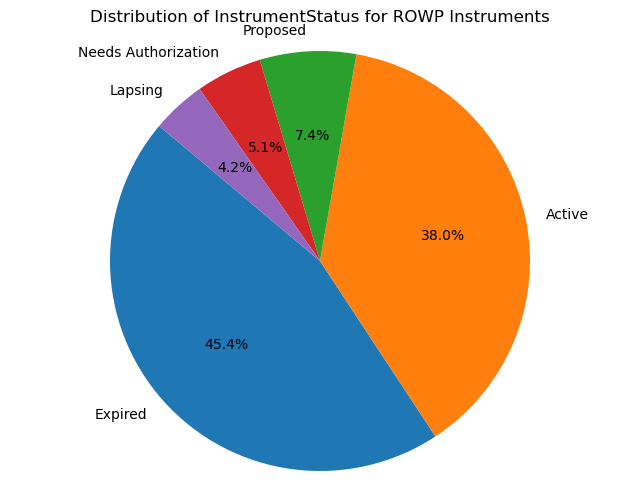

In [44]:
#SHOW BREAK DOWN OF STATUS FOR ALL ROW INSTRUMENTS IN YOUR REGIONAL SPREADSHEET

import pandas as pd
import matplotlib.pyplot as plt

# Read the spreadsheet for df_inst
file_path_inst = r"F:\ROW\ROW_Park_Folders\MLC-Instrument-NER-04152024.xlsx"
df_inst = pd.read_excel(file_path_inst)

# Filter the DataFrame to include only rows with instrument type "ROWP"
df_rowp = df_inst[df_inst['InstrumentTypeCode'] == 'ROWP']

# Group the filtered DataFrame by InstrumentStatus and count the occurrences
status_counts = df_rowp['InstrumentStatus'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of InstrumentStatus for ROWP Instruments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Enter an ALPHA: COLO


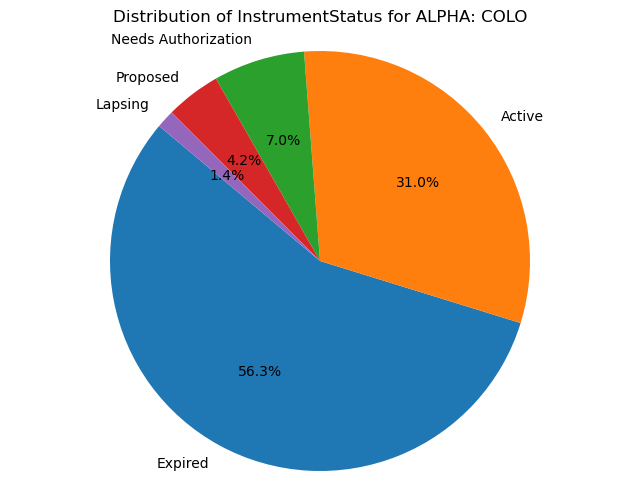

In [41]:
#THIS CELL ALLOWS USER TO ENTER A PARK ALPHA AND SHOWS ROWP Broken down by STATUS in a Pie chart
    # TO ENTER PARK, RUN CELL, THEN ENTER YOUR ALPHA IN BOX THAT WILL POP UP BELOW CELL, THEN PRESS 'ENTER'
import pandas as pd
import matplotlib.pyplot as plt

# Read the spreadsheet for df_inst
file_path_inst = r"F:\ROW\ROW_Park_Folders\MLC-Instrument-NER-04152024.xlsx"
df_inst = pd.read_excel(file_path_inst)

# Function to plot pie chart for the distribution of InstrumentStatus for a given ALPHA
def plot_status_pie_chart(df, alpha):
    # Filter the DataFrame to include only rows with the specified ALPHA
    df_alpha = df[df['Alphacode'] == alpha]
    
    # Group the filtered DataFrame by InstrumentStatus and count the occurrences
    status_counts = df_alpha['InstrumentStatus'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of InstrumentStatus for ALPHA: {alpha}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Input ALPHA from the user
alpha_input = input("Enter an ALPHA: ")

# Check if the input ALPHA is present in the DataFrame
if alpha_input in df_inst['Alphacode'].unique():
    # Plot pie chart for the distribution of InstrumentStatus for the specified ALPHA
    plot_status_pie_chart(df_inst, alpha_input)
else:
    print("ALPHA not found in the DataFrame.")

In [44]:
#TASK - Summarize counts of Powerline Encumbrances for each Alphacode

import pandas as pd

# Read the Excel file
excel_path = r"F:\ROW\MLC_Powerline-NPS-Enc.xlsx"
df = pd.read_excel(excel_path)

# Summarize counts by Alphacode
summary_df = df.groupby('Alphacode').size().reset_index(name='Count')

# Print the summary
print(summary_df)

    Alphacode  Count
0        ACAD     33
1        AGFO      2
2        ALFL      2
3        ALPO     50
4        ANDE      5
..        ...    ...
164      WICR      4
165      WORI      2
166      WRBR     13
167      YOSE      9
168      ZION     16

[169 rows x 2 columns]


In [53]:
#TASK - THIS SUMMARIZES ALL THE TRACTS FROM MLC by Region and Alphacode

import pandas as pd

# Read the Excel file
excel_file = r"F:\\ROW\\MLC_ALPHA_Tract_Region.xlsx"
df = pd.read_excel(excel_file)

# Group by Alphacode and RegionCode
region_df = df.groupby(['Alphacode', 'RegionCode']).size().reset_index(name='alphacount')

print(region_df)


    Alphacode RegionCode  alphacount
0        ABLI        SER           3
1        ACAD        NER        1084
2        ADAM        NER           7
3        AFBG        NER           1
4        AGFO        MWR          22
..        ...        ...         ...
442      YELL        IMR          43
443      YOSE        PWR        1053
444      YUCH        AKR         101
445      YUHO        IMR           4
446      ZION        IMR         165

[447 rows x 3 columns]


In [54]:
# Merge summary_df and region_df based on the Alphacode column
powerline_df = summary_df.merge(region_df, on='Alphacode', how='inner')

# Display the merged DataFrame
print(powerline_df)

    Alphacode  Count RegionCode  alphacount
0        ACAD     33        NER        1084
1        AGFO      2        MWR          22
2        ALFL      2        IMR           4
3        ALPO     50        NER         101
4        ANDE      5        SER          47
..        ...    ...        ...         ...
164      WICR      4        MWR          54
165      WORI      2        NER          20
166      WRBR     13        SER          23
167      YOSE      9        PWR        1053
168      ZION     16        IMR         165

[169 rows x 4 columns]


Enter the RegionCode: NER


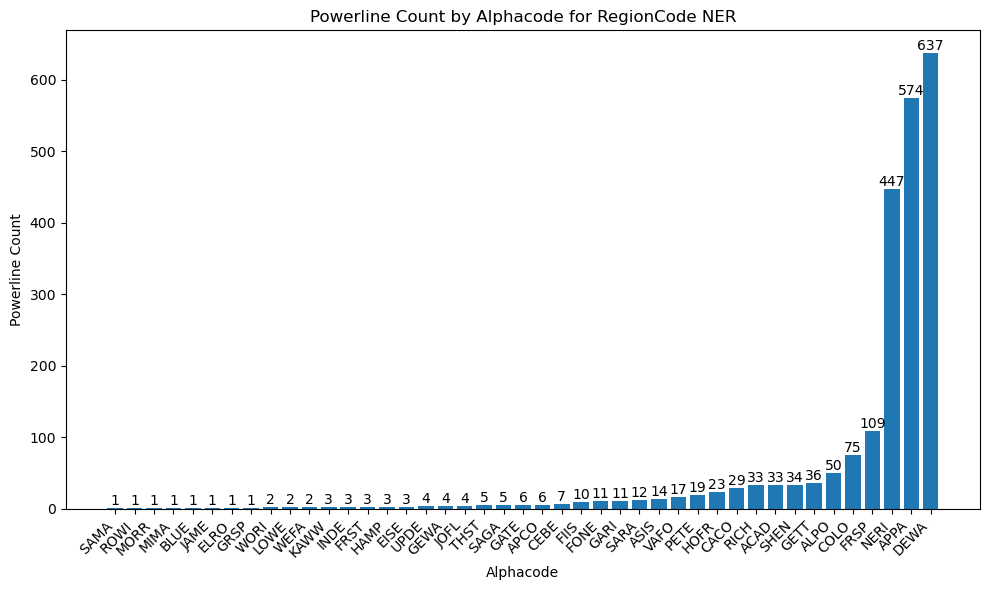

In [62]:
#TASK - WHEN YOU RUN THIS CELL, IT WILL PROMPT YOU FOR REGIONCODE, THEN PROVIDE A BAR GRAPH OF THE POWERLINE ENCUMBRANCES 
    #IN THAT REGION, PARSED BY ALPHA
    
import pandas as pd
import matplotlib.pyplot as plt

# Assuming powerline_df is the DataFrame containing the merged data
# Prompt the user to input the RegionCode
user_region_code = input("Enter the RegionCode: ")
# Sort the filtered DataFrame by 'Count' column in ascending order
sorted_filtered_powerline_df = filtered_powerline_df.sort_values(by='Count', ascending=True)

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_filtered_powerline_df['Alphacode'], sorted_filtered_powerline_df['Count'])

# Add numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.title(f'Powerline Count by Alphacode for RegionCode {user_region_code}')
plt.xlabel('Alphacode')
plt.ylabel('Powerline Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [67]:
# TASK IMPORT A TABLE OF ALL ENCUMBRANCES, AND GROUP BY ALPHA, SUMMARIZING EACH TYPE OF ENCUMBRANCE TYPE FOR EACH ALPHA

import pandas as pd

# Step 1: Read the Excel file into a DataFrame
allenc_df = pd.read_excel(r"F:\ROW\ROW_Park_Folders\ALLNPS_ENC.xlsx")

# Step 2: Join operation with region_df
joined_df = pd.merge(region_df, allenc_df, on='Alphacode', how='left')

# Step 3: Group and count the encumbrance types
encumbrance_counts = joined_df.groupby(['Alphacode', 'EncumbranceTypeName']).size().reset_index(name='EncumbranceCount')

# Step 4: Merge the counted encumbrance types with region_df
region_df_with_counts = pd.merge(region_df, encumbrance_counts, on='Alphacode', how='left')

# Step 5: Display the resulting DataFrame
print(region_df_with_counts)

     Alphacode RegionCode  alphacount EncumbranceTypeName  EncumbranceCount
0         ABLI        SER           3                 NaN               NaN
1         ACAD        NER        1084            Cemetery               4.0
2         ACAD        NER        1084             Leasing               1.0
3         ACAD        NER        1084         Life Estate               2.0
4         ACAD        NER        1084               Other              25.0
...        ...        ...         ...                 ...               ...
2141      ZION        IMR         165          Power-Line              16.0
2142      ZION        IMR         165           Railroads               3.0
2143      ZION        IMR         165               Roads              23.0
2144      ZION        IMR         165      Telephone Line              13.0
2145      ZION        IMR         165        Water Rights               8.0

[2146 rows x 5 columns]


In [68]:
# TASK - Group by RegionCode and EncumbranceTypeName, count occurrences, and reset index
summary_df = region_df_with_counts.groupby(['RegionCode', 'EncumbranceTypeName']).size().reset_index(name='EncumbranceCount')

# Display the resulting DataFrame
print(summary_df)

    RegionCode EncumbranceTypeName  EncumbranceCount
0          AKR             Ditches                 1
1          AKR             Leasing                 4
2          AKR         Life Estate                 3
3          AKR         Mineral-Oil                 1
4          AKR       Mineral-Other                 2
..         ...                 ...               ...
163        SER             Salvage                 2
164        SER      Telephone Line                17
165        SER              Timber                 3
166        SER   Underground Cable                 3
167        SER        Water Rights                13

[168 rows x 3 columns]


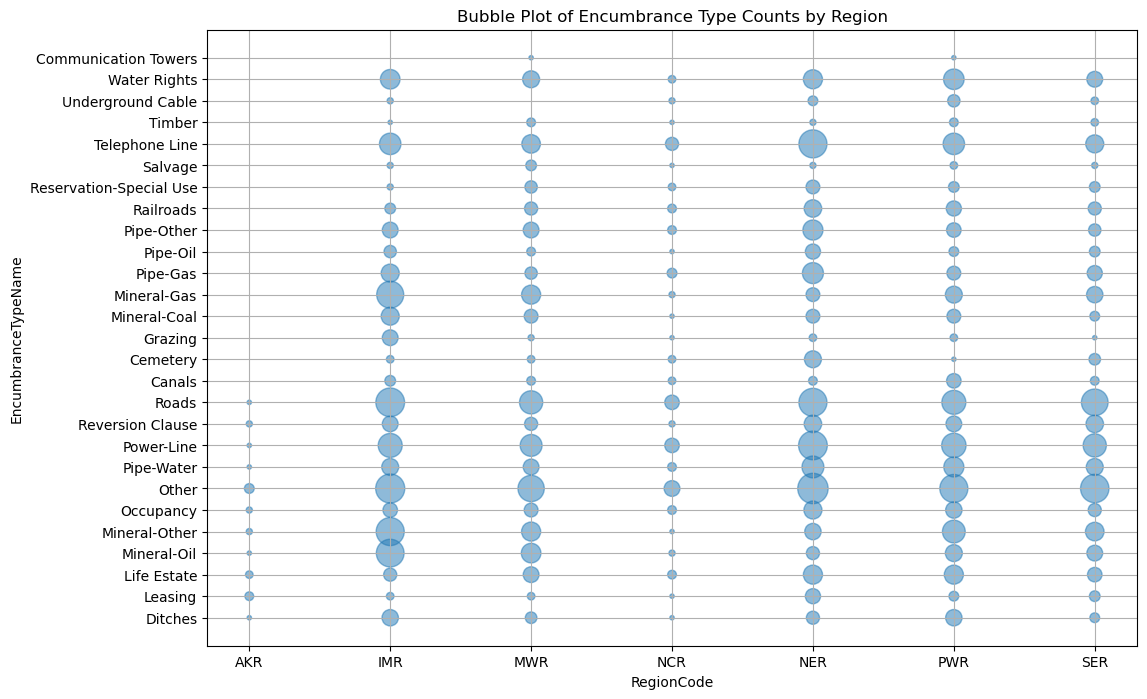

In [74]:
#TASK - SHOW A BUBBLE PLOT WITH BUBBLE PROPORTIONAL TO COUNT OF ENCUMBRANCE TYPE FOR EACH REGION
    # THIS HIGHLIGHTS REGIONS WITH A HIGHER BURDEN OF ENCUMBRANCE ENTRY, EXAMINATION, AND MAPPING BACKLOG
    
import matplotlib.pyplot as plt

# Filter out the 'Allenc' category from the summary_df
summary_df_filtered = summary_df[summary_df['EncumbranceTypeName'] != 'Allenc']

# Set the size of the bubbles based on the counts
bubble_sizes = summary_df_filtered['EncumbranceCount'] * 10  # Adjust the multiplier as needed

# Create the bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(summary_df_filtered['RegionCode'], summary_df_filtered['EncumbranceTypeName'], s=bubble_sizes, alpha=0.5)
plt.title('Bubble Plot of Encumbrance Type Counts by Region')
plt.xlabel('RegionCode')
plt.ylabel('EncumbranceTypeName')
plt.grid(True)
plt.show()


C:\Users\hdean\AppData\Local\Temp\1\ipykernel_13420\683237718.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


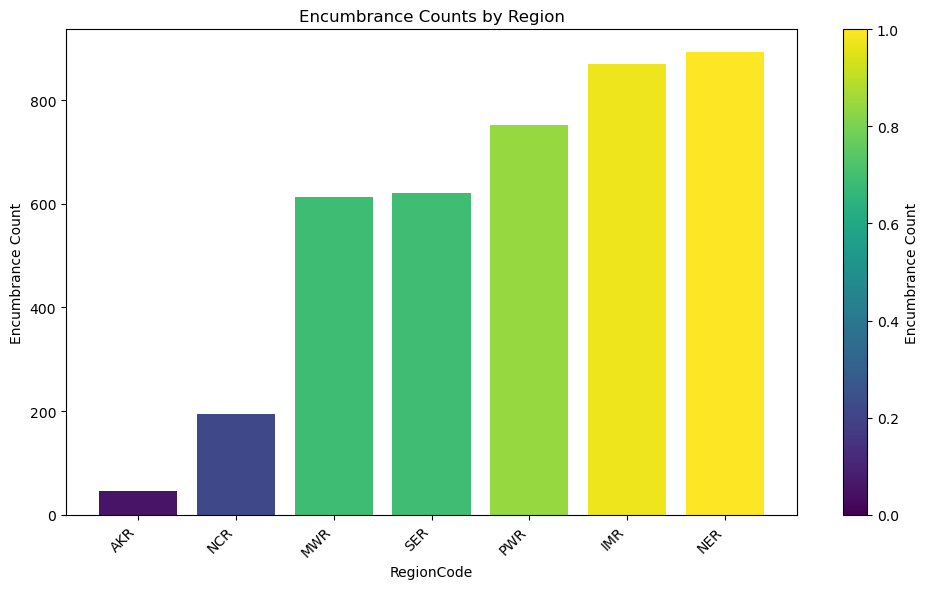

In [85]:
#TASK - SUMMARIZE TOTAL COUNTS OF ENCUMBRANCES FOR EACH REGION
    # CREATE BAR GRAPH SHOWING COMPARISON BETWEEN EACH REGION

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have summary_df

# Group by RegionCode and sum the EncumbranceCount
region_summary = summary_df.groupby('RegionCode')['EncumbranceCount'].sum().reset_index()

# Sort the DataFrame by EncumbranceCount in ascending order
region_summary_sorted = region_summary.sort_values(by='EncumbranceCount')

# Create a color map based on the magnitude of EncumbranceCount
colors = plt.cm.viridis(region_summary_sorted['EncumbranceCount'] / region_summary_sorted['EncumbranceCount'].max())

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(region_summary_sorted['RegionCode'], region_summary_sorted['EncumbranceCount'], color=colors)

# Add labels and title
plt.title('Encumbrance Counts by Region')
plt.xlabel('RegionCode')
plt.ylabel('Encumbrance Count')

# Show color bar legend
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))
cbar.set_label('Encumbrance Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

